In [1]:
# imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [2]:
# Cargar los datos

data = pd.read_csv('../data/HR-Employee-Attrition.csv')

In [3]:
# Eliminar variables irrelevantes
data.drop(columns=["EmployeeCount", "StandardHours", "EmployeeNumber", "Over18"], inplace=True)


In [4]:
#Features & Target

X = data.drop(columns=['Attrition'])  # Features
y = data['Attrition'].map({"Yes": 1, "No": 0})  # Target

In [8]:
# Encoding categorical variables

cat_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le 

In [9]:
# Create train and test (validation) samples

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (1176, 30), X_test: (294, 30), y_train: (1176,), y_test: (294,)


In [10]:
# Create and train the model

model = DecisionTreeClassifier()
hyperparameters = model.get_params()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
y_pred = model.predict(X_test)

print('Model:', model, '\n')
print('Model hyperparameters:', hyperparameters, '\n')
print('Ground truth target:', y_test, '\n')
print('Predicted target:', y_pred, '\n')

Model: DecisionTreeClassifier() 

Model hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'} 

Ground truth target: 1041    0
184     0
1222    1
67      0
220     0
       ..
567     0
560     0
945     0
522     0
651     0
Name: Attrition, Length: 294, dtype: int64 

Predicted target: [0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [12]:
# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred)
rmse

0.22108843537414966

In [13]:
# Visual analysis

check = pd.DataFrame({'Ground truth':y_test[:10],
                      'Predictions':y_pred[:10], 
                      'RMSE':rmse})
check

,Ground truth,Predictions,RMSE
1041,0,0,0.221088
184,0,0,0.221088
1222,1,0,0.221088
67,0,0,0.221088
220,0,0,0.221088
494,0,1,0.221088
430,0,1,0.221088
240,0,0,0.221088
218,0,0,0.221088
49,0,0,0.221088


In [14]:
#Modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [15]:
txt = f"""
Accuracy: {accuracy:.4f}
Precision: {precision:.4f}
Recall: {recall:.4f}
F1 Score: {f1:.4f}
ROC AUC Score: {roc_auc:.4f}
"""
print(txt)


Accuracy: 0.7789
Precision: 0.1750
Recall: 0.1795
F1 Score: 0.1772
ROC AUC Score: 0.5250



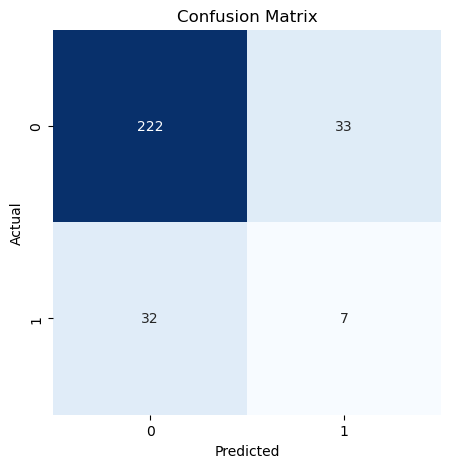

In [16]:
# Mtriz de confusión
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()


In [18]:
'''
Accuracy (Exactitud): 0.7789 → El 77.89% de las predicciones fueron correctas.
Precision (Precisión): 0.1750 → De los empleados que el modelo predijo como renunciantes (1), solo el 17.5% realmente renunció.
Recall (Sensibilidad): 0.1795 → De todos los empleados que realmente renunciaron, el modelo solo detectó el 17.95%.
F1-Score: 0.1772 → Baja combinación de precisión y recall.
ROC AUC Score: 0.5250 → Modelo apenas mejor que una predicción aleatoria (0.5).

'''

'\nAccuracy (Exactitud): 0.7789 → El 77.89% de las predicciones fueron correctas.\nPrecision (Precisión): 0.1750 → De los empleados que el modelo predijo como renunciantes (1), solo el 17.5% realmente renunció.\nRecall (Sensibilidad): 0.1795 → De todos los empleados que realmente renunciaron, el modelo solo detectó el 17.95%.\nF1-Score: 0.1772 → Baja combinación de precisión y recall.\nROC AUC Score: 0.5250 → Modelo apenas mejor que una predicción aleatoria (0.5).\n\n'